# Introduction

The goal from the visualization of this dataset is to gather insights by answering question. 

### Key questions to answer

1. How does Hours Studied correlate with Performance Index?
2. What pattern emerges between Previous Scores and Performance Index?
3. How do Extracurricular Activities affect a student's Performance?
4. Do Sleep Hours seem to affect Performance Index?
5. Is there a noticeable difference in Performance Index for students practicing fewer than 3 question papers versus more than 5?
6. Do students with Extracurriculars practice more sample papers than those without?

# Importing necessary libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Loading data

In [17]:
df = pd.read_csv("StudentPerformance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Quick data overview

In [18]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [20]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [21]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [22]:
df.duplicated().sum()

127

In [23]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Save cleaned data to use later for dashboard

In [24]:
# df.to_csv("student performance cleaned.csv")

# Visualization

### 1. How does Hours Studied correlate with Performance Index?

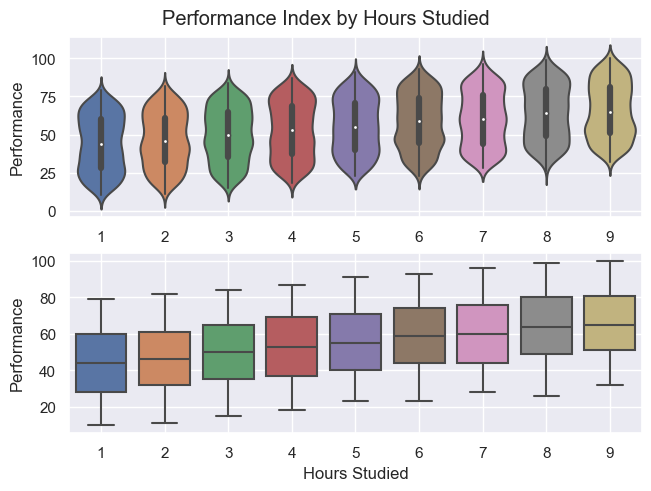

In [ ]:
fig, ax = plt.subplots(2, 1, constrained_layout=True)
sns.set_theme("notebook")
sns.set_style("dark")
sns.violinplot(data=df, x="Hours Studied", y="Performance Index", ax=ax[0])
sns.boxplot(data=df, x="Hours Studied", y="Performance Index", ax=ax[1])
ax[0].grid()
ax[0].set_xlabel("")
ax[0].set_ylabel("Performance")
ax[1].grid()
ax[1].set_ylabel("Performance")
fig.suptitle("Performance by Hours Studied")
plt.show()

- We can clearly see that the more hours a student spends studying, the more his performance will be.
- There is a positive correlation between hours studied and performance index.
- Some students managed to perform well despite studying for juew 1-3 hours.

### 2. What pattern emerges between Previous Scores and Performance Index?

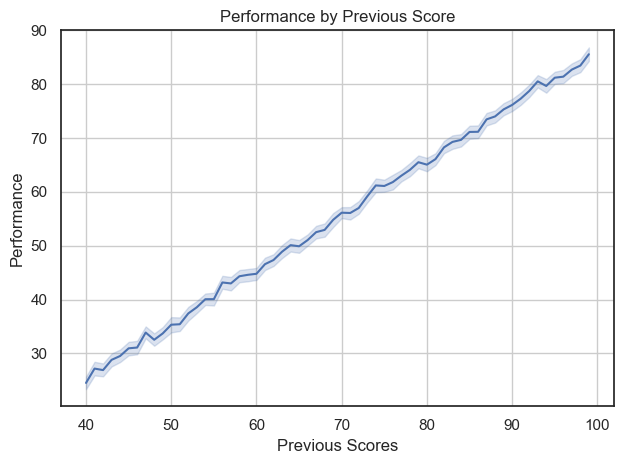

In [26]:
sns.set_style('white')
sns.lineplot(data=df, x="Previous Scores", y="Performance Index")
plt.title("Performance by Previous Score")
plt.ylabel("Performance")
plt.grid()
plt.tight_layout()
plt.show()


- A student's performance improves as their previous scores increase, Suggesting a positive pattern.

### 3. How do Extracurricular Activities affect a student's Performance?

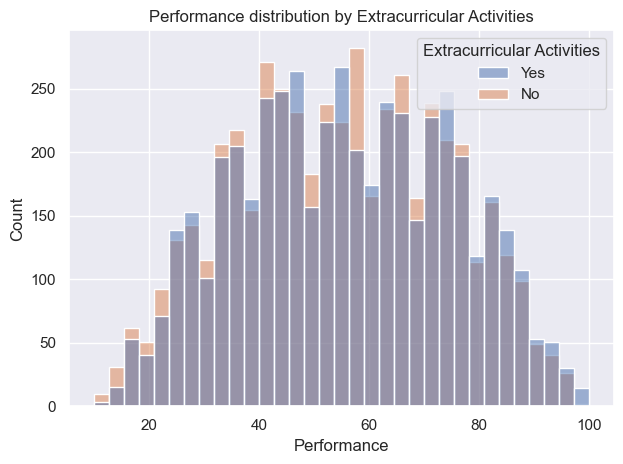

In [ ]:
sns.set_style("dark")
sns.histplot(data=df, x="Performance Index", hue="Extracurricular Activities")
plt.title("Performance distribution by Extracurricular Activities")
plt.xlabel("Performance")
plt.grid()
plt.tight_layout()
plt.show()

- Overall there is little difference, except that students with performance <= 40 have no extracurricular activities, while those with performance >= 75 do. This implies that students with high performance are more likely to join activities.

### 4. Do Sleep Hours seem to affect Performance Index?

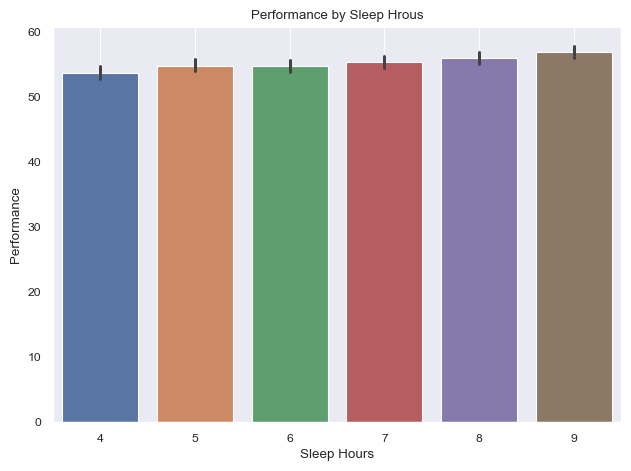

In [ ]:
sns.set_theme("paper")
sns.barplot(data=df, x='Sleep Hours', y="Performance Index")
plt.title("Average Performance by Sleep Hrous")
plt.ylabel("Average Performance")
plt.grid()
plt.tight_layout()
plt.show()

- Students who get more sleep perform better, suggesting that a consistent sleep schedule significantly improves outcomes.

### 5. Is there a noticeable difference in Performance Index for students practicing fewer than 3 question papers versus more than 5?

In [39]:
group_labels = [
    ("Fewer than 3 papers", df[df["Sample Question Papers Practiced"] < 3]),
    ("More than 5 papers", df[df["Sample Question Papers Practiced"] > 5]),
]

summary = []
for label, group_df in group_labels:
    avg_performance = round(group_df["Performance Index"].mean(), 2)
    summary.append((label, avg_performance))

summary_df = pd.DataFrame(summary, columns=["Group", "Average Performance"])
summary_df

,Group,Average Performance
0,Fewer than 3 papers,54.26
1,More than 5 papers,56.10


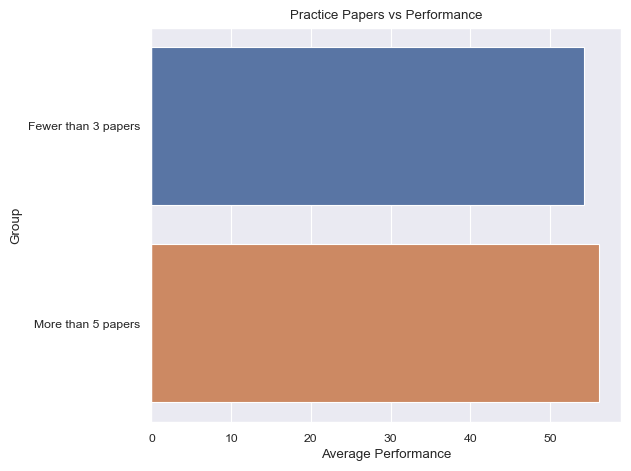

In [42]:
sns.barplot(data=summary_df, y="Group", x="Average Performance")
plt.title("Practice Papers vs Performance")
plt.tight_layout()
plt.show()


- There isn't much of a difference between the two, practicing more papers does help but not significantly.

### 6. Do students with Extracurricular Activities practice more sample papers than those without?

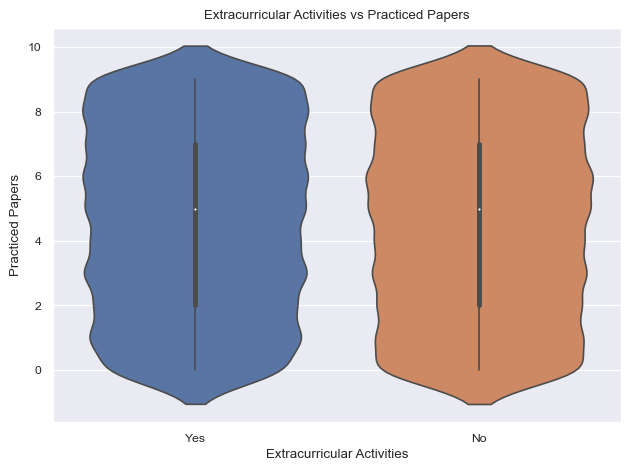

In [51]:
sns.violinplot(data=df, y="Sample Question Papers Practiced", x="Extracurricular Activities")
plt.title("Extracurricular Activities vs Practiced Papers")
plt.ylabel("Practiced Papers")
plt.tight_layout()
plt.show()

- Almost no difference between students with extracurricular activities and those without, both groups practice on same amount of sample papers.